In [2]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2.ximgproc
import skimage as ski

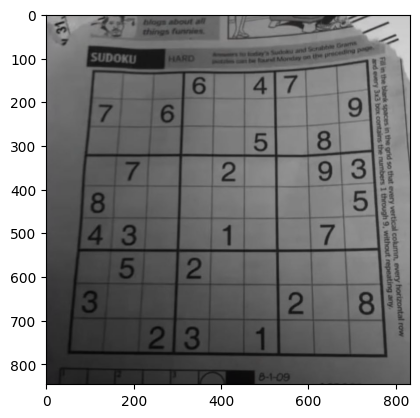

In [3]:
img =cv2.imread("sudoku.jpg")
plt.imshow(img)

In [4]:
type(img)

numpy.ndarray

<h3>Adjust Log</h3>
image: The input image to be adjusted. This can be a grayscale or color image.

gain: This parameter controls the intensity scaling of the output image. Larger values of gain will result in stronger intensity scaling, while smaller values will result in less scaling. The default value of gain is 1.

inverse: This parameter controls whether the output image is the inverse of the logarithmic scaling function. If inverse is set to True, the output image will be the inverse of the logarithmic scaling function, resulting in a darker image. If inverse is set to False, the output image will be the logarithmic scaling function, resulting in a brighter image. The default value of inverse is False.

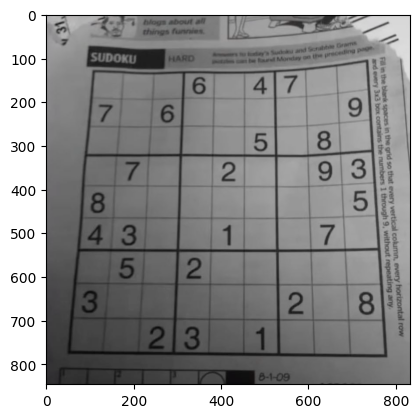

In [9]:
img_log = ski.exposure.adjust_log(img, gain=1, inv= False)
plt.imshow(img_log)

<h3>Gamma Transformation</h3>

new_pixel_value{0-1} = old_pixel_value{0-1} ^ gamma


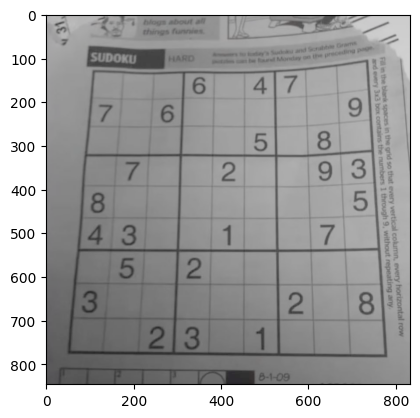

In [23]:
img_gamma = ski.exposure.adjust_gamma(img, gamma=0.5, gain = 0.9)
plt.imshow(img_gamma)

<h3>Histogram Equalization</h3>

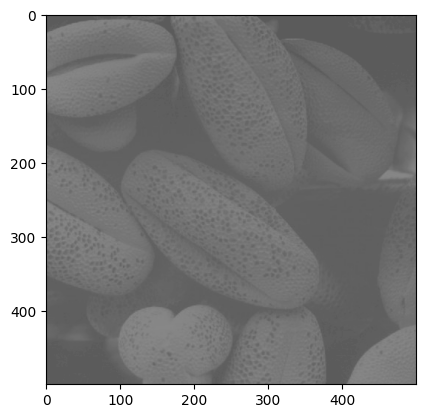

In [35]:
img = cv2.imread('wiki.png')
plt.imshow(img, cmap='gray')

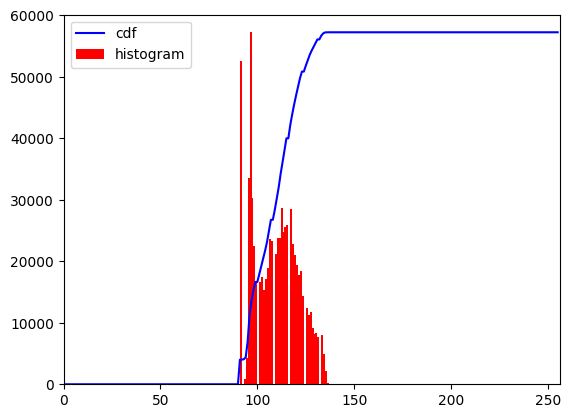

In [42]:
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

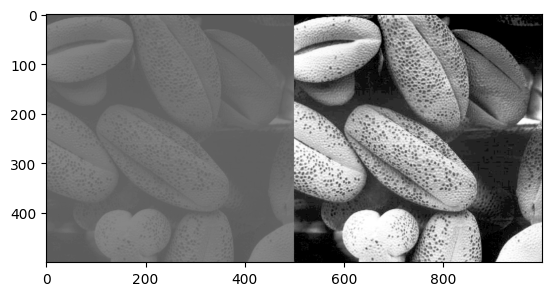

In [50]:
img = cv2.imread('wiki.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
plt.imshow(res,'gray')

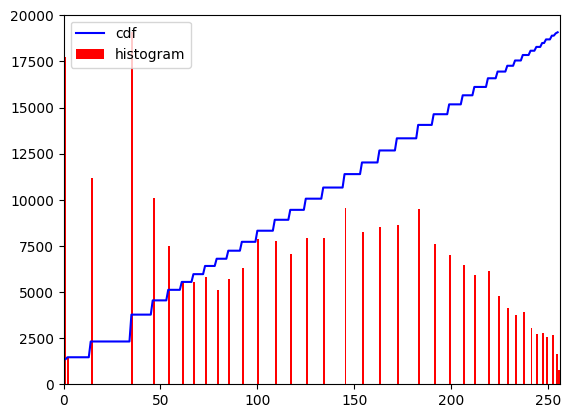

In [51]:
hist, bins = np.histogram(equ.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<h3>Adaptive Histogram Equalization (CLAHE)</h3>

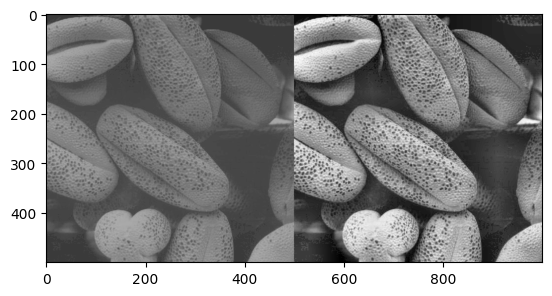

In [57]:
img = cv2.imread('wiki.png',0)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img,cl1))
plt.imshow(res,cmap='gray')
